In [1]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ts_df=pd.read_csv(r"C:\Users\matho\Downloads\MSFT.csv")
ts_df['Date']=pd.to_datetime(ts_df['Date'])
ts_df=ts_df.set_index('Date')
ts_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-05-11,68.360001,68.730003,68.120003,68.459999,63.906345,28789400
2017-05-12,68.610001,68.610001,68.040001,68.379997,63.831684,18714100
2017-05-15,68.139999,68.480003,67.570000,68.430000,63.878361,31530300
2017-05-16,68.230003,69.440002,68.160004,69.410004,65.164574,34956000
2017-05-17,68.889999,69.099998,67.430000,67.480003,63.352604,30548800


In [3]:
ts_df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [4]:
ts_df.index

DatetimeIndex(['2017-05-11', '2017-05-12', '2017-05-15', '2017-05-16',
               '2017-05-17', '2017-05-18', '2017-05-19', '2017-05-22',
               '2017-05-23', '2017-05-24',
               ...
               '2022-04-27', '2022-04-28', '2022-04-29', '2022-05-02',
               '2022-05-03', '2022-05-04', '2022-05-05', '2022-05-06',
               '2022-05-09', '2022-05-10'],
              dtype='datetime64[ns]', name='Date', length=1259, freq=None)

In [5]:
ts_df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
ts_df.drop(['Low','Open','High','Volume','Adj Close'],axis=1,inplace=True)

In [7]:
ts_df.head()

,Close
Date,
2017-05-11,68.459999
2017-05-12,68.379997
2017-05-15,68.430000
2017-05-16,69.410004
2017-05-17,67.480003


In [364]:
ts_df.describe()

,Close
count,1259.000000
mean,170.964662
std,79.627929
min,67.480003
25%,103.354999
50%,144.059998
75%,232.360001
max,343.109985


In [8]:
ts_df.tail()

,Close
Date,
2022-05-04,289.980011
2022-05-05,277.350006
2022-05-06,274.730011
2022-05-09,264.579987
2022-05-10,269.500000


In [9]:
yr_dt=ts_df['2021-05-11':]
yr_dt

,Close
Date,
2021-05-11,246.229996
2021-05-12,239.000000
2021-05-13,243.029999
2021-05-14,248.149994
2021-05-17,245.179993
...,...
2022-05-04,289.980011
2022-05-05,277.350006
2022-05-06,274.730011


In [10]:
ts_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2017-05-11 to 2022-05-10
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1259 non-null   float64
dtypes: float64(1)
memory usage: 52.0 KB


# Exploratory Data Analysis

C:\Users\matho\AppData\Local\Programs\Python\Python310\Lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

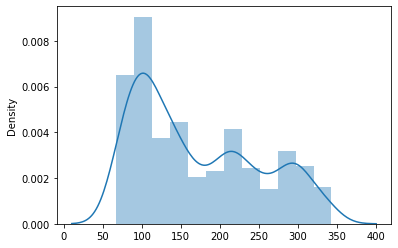

In [417]:
import seaborn as sns
sns.distplot(ts_df)

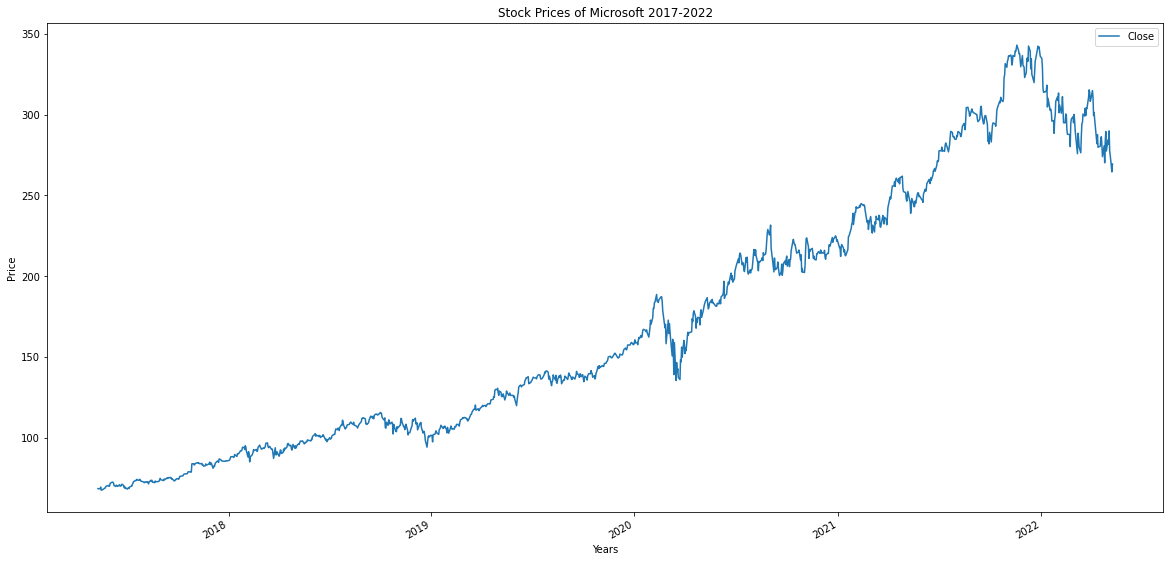

In [11]:
ts_df.plot(label='Closing Price',figsize=(20,10))
plt.title('Stock Prices of Microsoft 2017-2022')
plt.xlabel('Years')
plt.ylabel('Price')
plt.show()

<Figure size 720x1440 with 0 Axes>

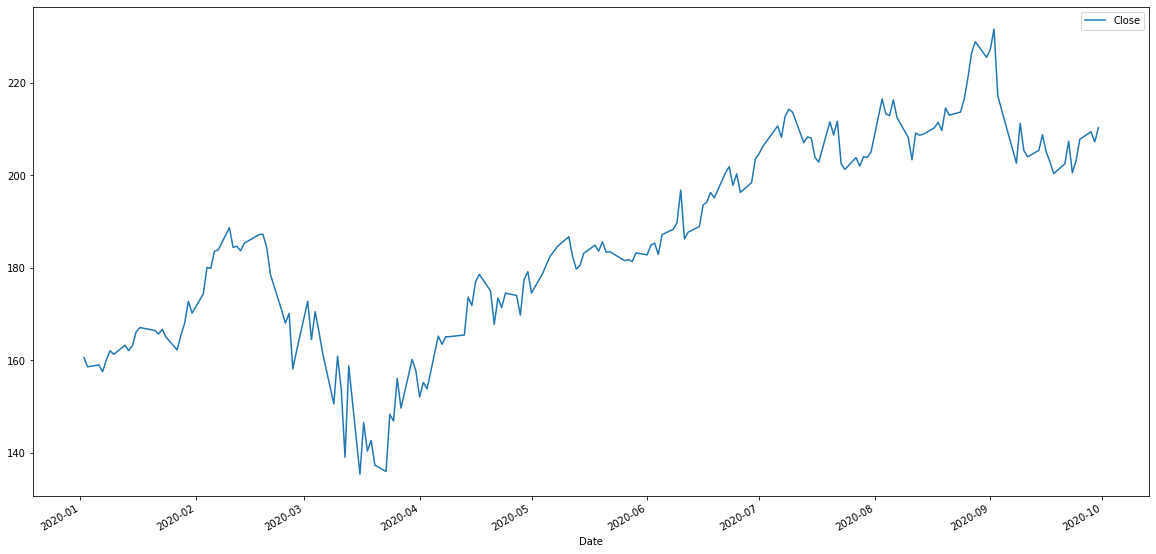

In [12]:
plt.figure(figsize=(10,20))
ts_df['2020-01-01':'2020-09-30'].plot(figsize=(20,10))
plt.show()

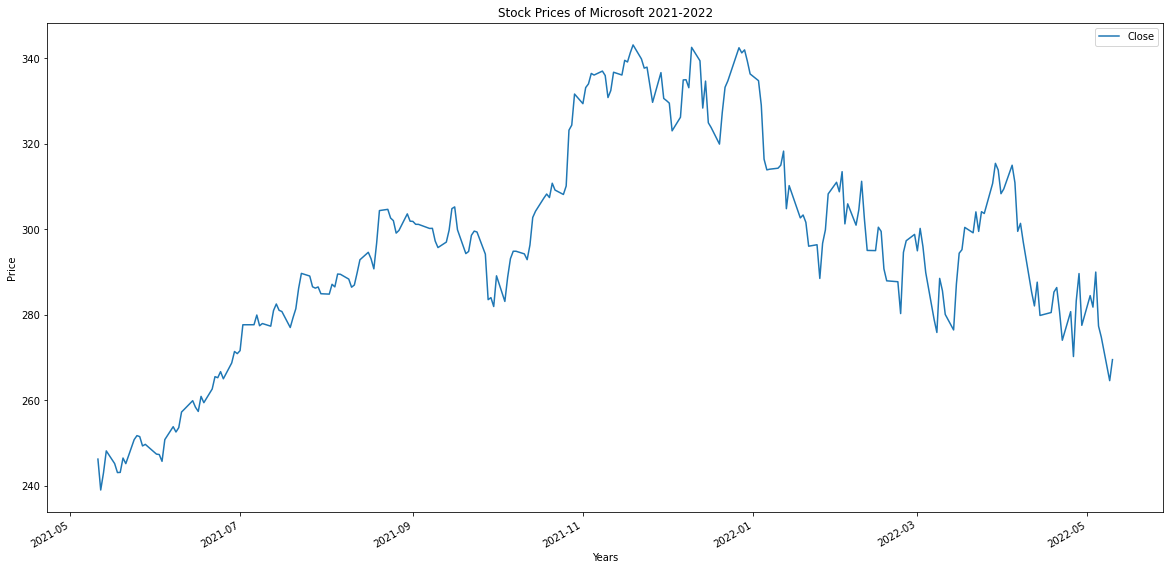

In [13]:
yr_dt.plot(label='Microsoft',figsize=(20,10))
plt.title('Stock Prices of Microsoft 2021-2022')
plt.xlabel('Years')
plt.ylabel('Price')
plt.show()

# Sesonal Decomposing

In [14]:
from statsmodels.tsa.stattools import acf,pacf
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA

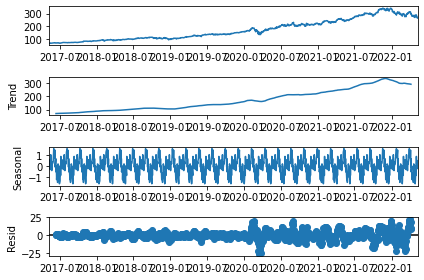

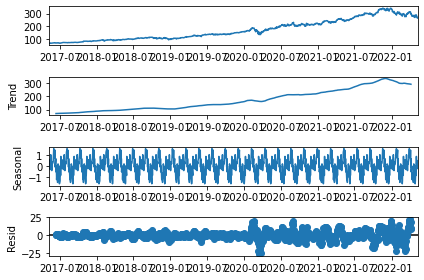

In [412]:
from statsmodels.tsa.seasonal import seasonal_decompose
results=seasonal_decompose(ts_df,period=45)
results.plot()

# Checking Stationary

In [16]:
def check_stationary(time_series):

 #rolling statistics
 roll_mean=time_series.rolling(10).mean()
 roll_std=time_series.rolling(10).std()

 #plotting rolling statistics
 fig = plt.figure(figsize=(20,10))
 plt.subplot(211)
 plt.plot(time_series, color='black', label='Original Data')
 plt.plot(roll_mean, color='red', label='Rolling Mean(20 days)')
 plt.legend()
 plt.subplot(212)
 plt.plot(roll_std, color='green', label='Rolling Std Dev(5 days)')
 plt.legend()

 
 #Dickey-Fuller Test-- Null Hypothesis: TimeSeries is non-stationary

 print('Dickey-Fuller Test Results:\n')
 adf_results=adfuller(time_series,regresults=False)
 test_result = pd.Series(adf_results[0:4], index=['ADF Test Statistic:','p-value:','No. of lags:','No. of Obs:'])
 print(test_result)
 for k,v in adf_results[4].items():
     print('Critical value at %s: %1.5f' %(k,v))
    

Dickey-Fuller Test Results:

ADF Test Statistic:      -0.671442
p-value:                  0.854009
No. of lags:              9.000000
No. of Obs:            1249.000000
dtype: float64
Critical value at 1%: -3.43560
Critical value at 5%: -2.86386
Critical value at 10%: -2.56800


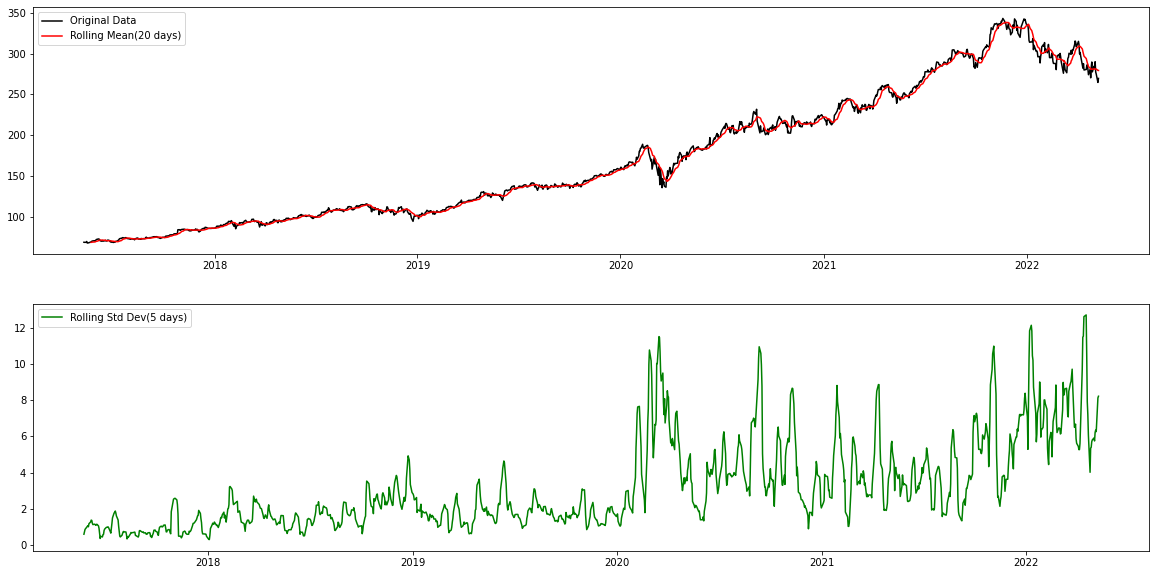

In [17]:
#original stock data
check_stationary(ts_df)

In [19]:
ts_diff = ts_df - ts_df.shift(1)
ts_diff.dropna(axis=0,inplace=True)
ts_diff

,Close
Date,
2017-05-12,-0.080002
2017-05-15,0.050003
2017-05-16,0.980004
2017-05-17,-1.930001
2017-05-18,0.229996
...,...
2022-05-04,8.200012
2022-05-05,-12.630005
2022-05-06,-2.619995


In [365]:
ts_diff.describe()

,Close
count,1258.000000
mean,0.159809
std,3.389362
min,-23.410004
25%,-1.067499
50%,0.165005
75%,1.454994
max,19.770004


In [22]:
#log tranformation of stock data
log_df = np.log(ts_df)
log_df.dropna(inplace = True)

#differenced log transformation
log_df_diff = log_df - log_df.shift(3)
log_df_diff.dropna(inplace = True)
print(log_df.head())
print(log_df_diff.head())

               Close
Date                
2017-05-11  4.226250
2017-05-12  4.225080
2017-05-15  4.225811
2017-05-16  4.240031
2017-05-17  4.211831
               Close
Date                
2017-05-16  0.013781
2017-05-17 -0.013249
2017-05-18 -0.010577
2017-05-19 -0.025093
2017-05-22  0.014272


<AxesSubplot:xlabel='Date'>

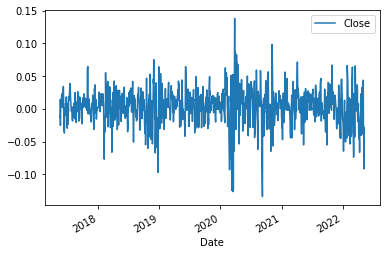

In [413]:
log_df_diff.plot()

Dickey-Fuller Test Results:

ADF Test Statistic:   -1.181199e+01
p-value:               8.816051e-22
No. of lags:           8.000000e+00
No. of Obs:            1.249000e+03
dtype: float64
Critical value at 1%: -3.43560
Critical value at 5%: -2.86386
Critical value at 10%: -2.56800


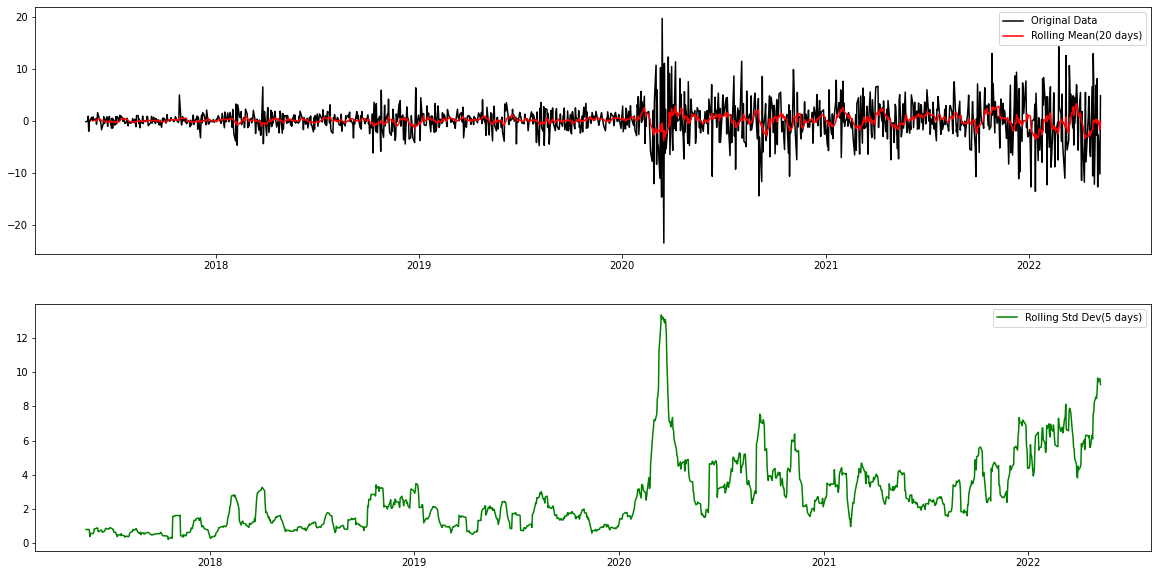

In [23]:
check_stationary(ts_diff)

C:\Users\matho\AppData\Local\Programs\Python\Python310\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 1440x720 with 0 Axes>

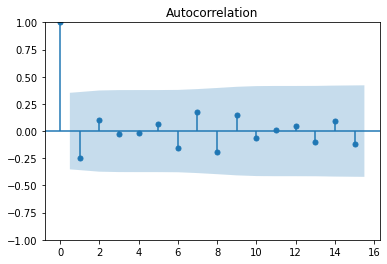

<Figure size 1440x720 with 0 Axes>

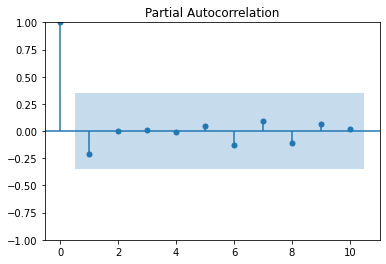

In [24]:
import statsmodels.api as sm
df_acf=acf(ts_diff)
df_pacf=pacf(ts_diff)
fig1=plt.figure(figsize=(20,10))
fig1=sm.graphics.tsa.plot_acf(df_acf)
fig2=plt.figure(figsize=(20,10))
fig2=sm.graphics.tsa.plot_pacf(df_pacf,lags=10)

Dickey-Fuller Test Results:

ADF Test Statistic:      -1.244590
p-value:                  0.654126
No. of lags:              9.000000
No. of Obs:            1249.000000
dtype: float64
Critical value at 1%: -3.43560
Critical value at 5%: -2.86386
Critical value at 10%: -2.56800


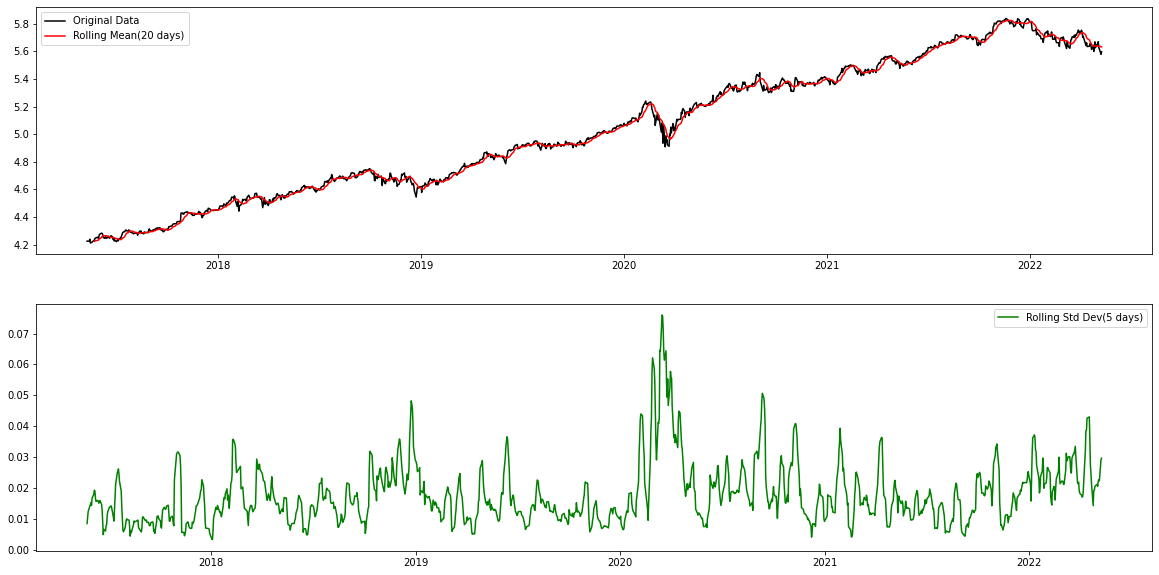

In [25]:
check_stationary(log_df)

C:\Users\matho\AppData\Local\Programs\Python\Python310\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 1440x720 with 0 Axes>

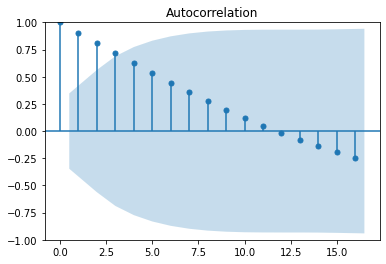

<Figure size 1440x720 with 0 Axes>

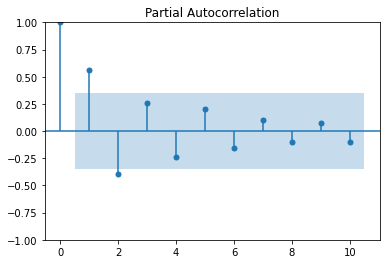

In [26]:
import statsmodels.api as sm
df_acf=acf(log_df)
df_pacf=pacf(log_df)
fig1=plt.figure(figsize=(20,10))
fig1=sm.graphics.tsa.plot_acf(df_acf)
fig2=plt.figure(figsize=(20,10))
fig2=sm.graphics.tsa.plot_pacf(df_pacf,lags=10)

Dickey-Fuller Test Results:

ADF Test Statistic:   -9.092220e+00
p-value:               3.797241e-15
No. of lags:           2.300000e+01
No. of Obs:            1.232000e+03
dtype: float64
Critical value at 1%: -3.43567
Critical value at 5%: -2.86389
Critical value at 10%: -2.56802


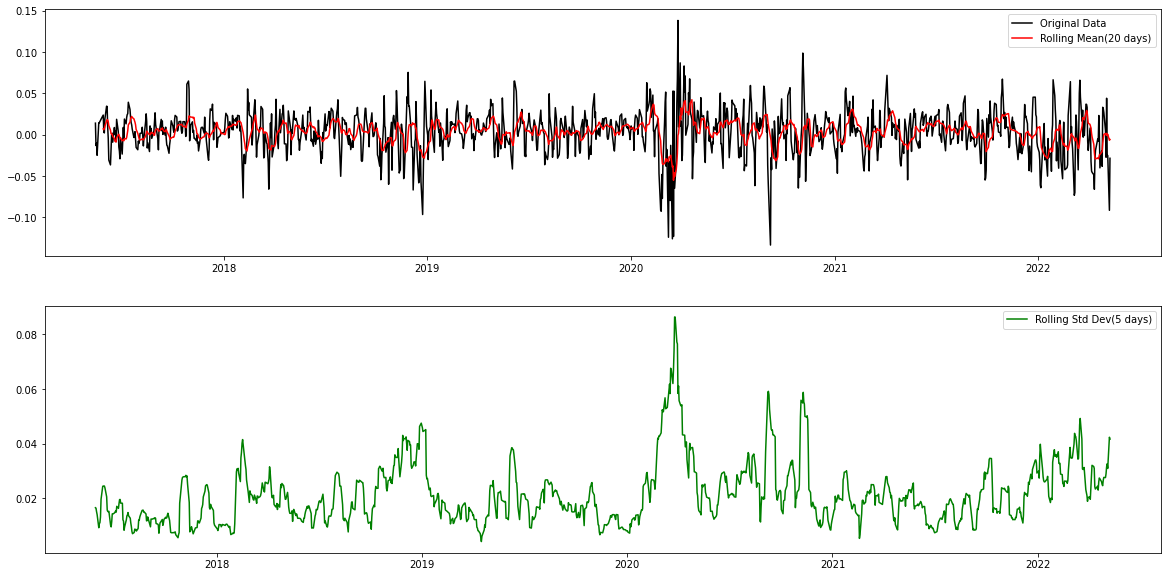

In [27]:
check_stationary(log_df_diff)

C:\Users\matho\AppData\Local\Programs\Python\Python310\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 1440x720 with 0 Axes>

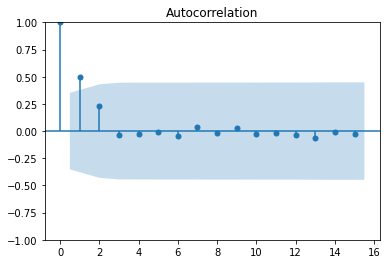

<Figure size 1440x720 with 0 Axes>

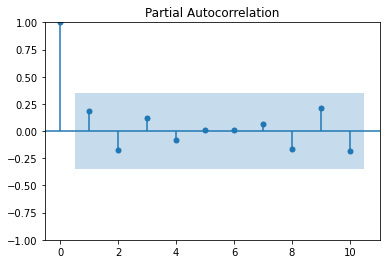

In [28]:
df_acf=acf(log_df_diff)
df_pacf=pacf(log_df_diff)
fig1=plt.figure(figsize=(20,10))
fig1=sm.graphics.tsa.plot_acf(df_acf)
fig2=plt.figure(figsize=(20,10))
fig2=sm.graphics.tsa.plot_pacf(df_pacf,lags=10)

# Post - Covid

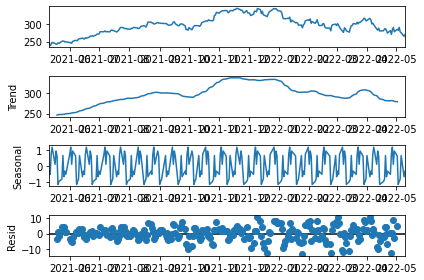

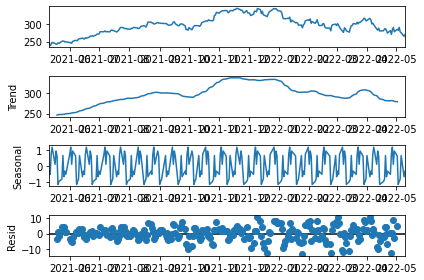

In [29]:
results=seasonal_decompose(yr_dt,period=12)
results.plot()

Dickey-Fuller Test Results:

ADF Test Statistic:     -2.023267
p-value:                 0.276466
No. of lags:             0.000000
No. of Obs:            252.000000
dtype: float64
Critical value at 1%: -3.45657
Critical value at 5%: -2.87308
Critical value at 10%: -2.57292


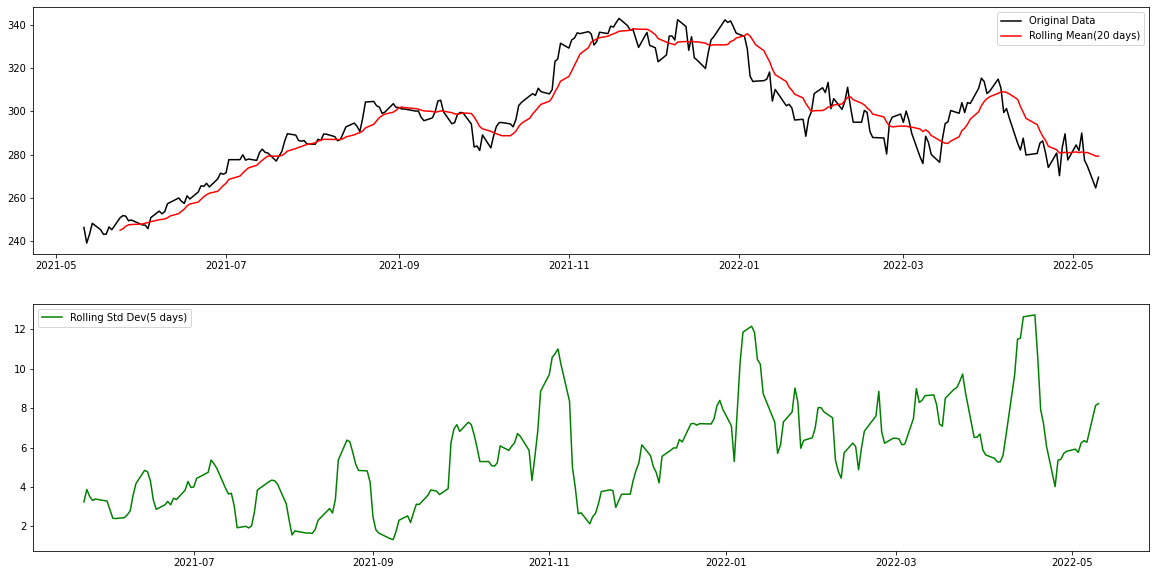

In [30]:
check_stationary(yr_dt)

In [31]:
yr_diff = yr_dt - yr_dt.shift(1)
yr_diff.dropna(axis=0,inplace=True)
yr_diff

,Close
Date,
2021-05-12,-7.229996
2021-05-13,4.029999
2021-05-14,5.119995
2021-05-17,-2.970001
2021-05-18,-2.099991
...,...
2022-05-04,8.200012
2022-05-05,-12.630005
2022-05-06,-2.619995


Dickey-Fuller Test Results:

ADF Test Statistic:   -1.747122e+01
p-value:               4.541655e-30
No. of lags:           0.000000e+00
No. of Obs:            2.510000e+02
dtype: float64
Critical value at 1%: -3.45667
Critical value at 5%: -2.87312
Critical value at 10%: -2.57294


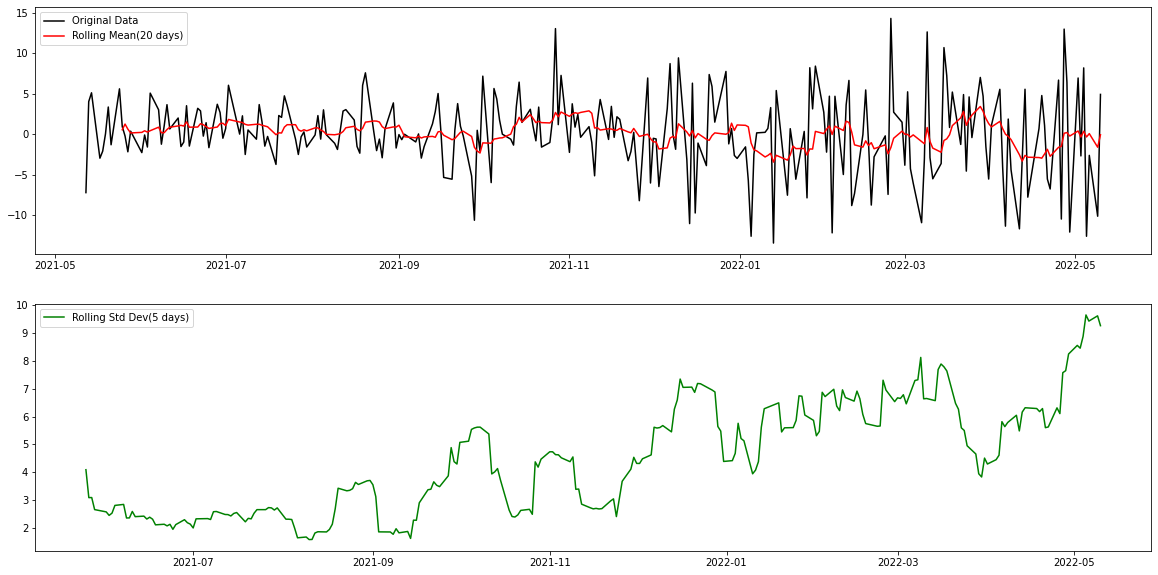

In [32]:
check_stationary(yr_diff)

C:\Users\matho\AppData\Local\Programs\Python\Python310\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 1440x720 with 0 Axes>

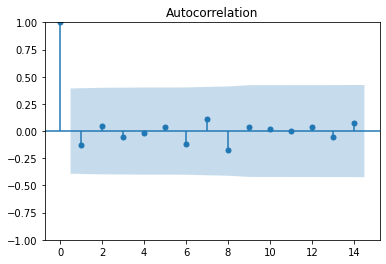

<Figure size 1440x720 with 0 Axes>

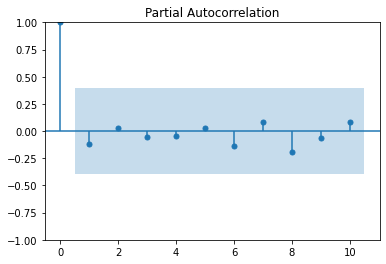

In [33]:
yr_acf=acf(yr_diff)
yr_pacf=pacf(yr_diff )
fig1=plt.figure(figsize=(20,10))
fig1=sm.graphics.tsa.plot_acf(yr_acf)
fig2=plt.figure(figsize=(20,10))
fig2=sm.graphics.tsa.plot_pacf(yr_pacf,lags=10)

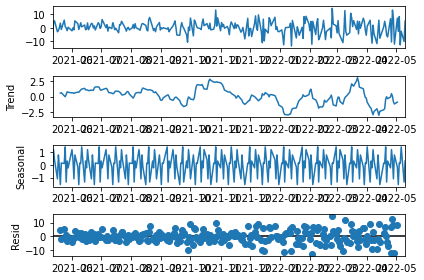

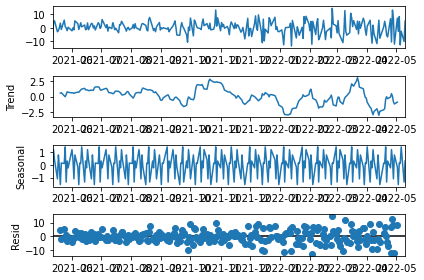

In [34]:
results=seasonal_decompose(yr_diff,model="additive",period=12)
results.plot()

In [35]:
yr_diff.tail()

,Close
Date,
2022-05-04,8.200012
2022-05-05,-12.630005
2022-05-06,-2.619995
2022-05-09,-10.150024
2022-05-10,4.920013


In [36]:
yr_train_df=yr_diff.loc['2022-01-01':'2022-04-27']
yr_test_df=yr_diff.loc['2022-04-27':]

In [37]:
yr_train_df.shape

(80, 1)

In [38]:
yr_test_df.shape

(10, 1)

In [39]:
from pmdarima import auto_arima

In [40]:
returns_model=auto_arima(yr_train_df,start_p=0,start_q=0,d=1,
                seasonal=False,suppress_warnings=True,
                trace=True,error_action='ignore',
                stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=581.525, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=556.207, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=579.555, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=549.709, Time=0.08 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=542.274, Time=0.20 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=539.143, Time=0.22 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=541.084, Time=0.22 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.69 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.84 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=537.259, Time=0.14 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=540.381, Time=0.09 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=539.201, Time=0.15 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=inf, Time=0.47 sec
 A

In [41]:
returns_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   80
Model:               SARIMAX(4, 1, 0)   Log Likelihood                -263.630
Date:                Wed, 20 Jul 2022   AIC                            537.259
Time:                        05:46:34   BIC                            549.106
Sample:                             0   HQIC                           542.005
                                 - 80                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9415      0.145     -6.512      0.000      -1.225      -0.658
ar.L2         -0.7195      0.191     -3.772      0.000      -1.093      -0.346
ar.L3         -0.5640      0.164     -3.440      0.001      -0.885      -0.243
ar.L4         -0.2637      0.116     -2.267      0.023      -0.492      -0.036
sigma2        45.6243      7.831      5.826      0.000      30.277      60.972
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.42
Prob(Q):                              0.90   Prob(JB):                         0.81
Heteroskedasticity (H):               1.05   Skew:                             0.16
Prob(H) (two-sided):                  0.90   Kurtosis:                         2.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [42]:
yr_future_forecast = returns_model.predict(n_periods=10)
#yr_future_forecast = np.exp(yr_future_forecast)
yr_future_forecast

array([-4.02831112,  1.23772315, -0.18866667,  0.77235741,  2.41385478,
       -0.40706866,  0.90178312,  0.52008919,  1.09578479,  0.83406526])

In [43]:
yr_future_forecast = pd.DataFrame(yr_future_forecast,index = yr_test_df.index,columns=['Prediction'])

yr_future_forecast.index = pd.to_datetime(yr_future_forecast.index, format="%Y/%m/%d")
yr_future_forecast.head()

,Prediction
Date,
2022-04-27,-4.028311
2022-04-28,1.237723
2022-04-29,-0.188667
2022-05-02,0.772357
2022-05-03,2.413855


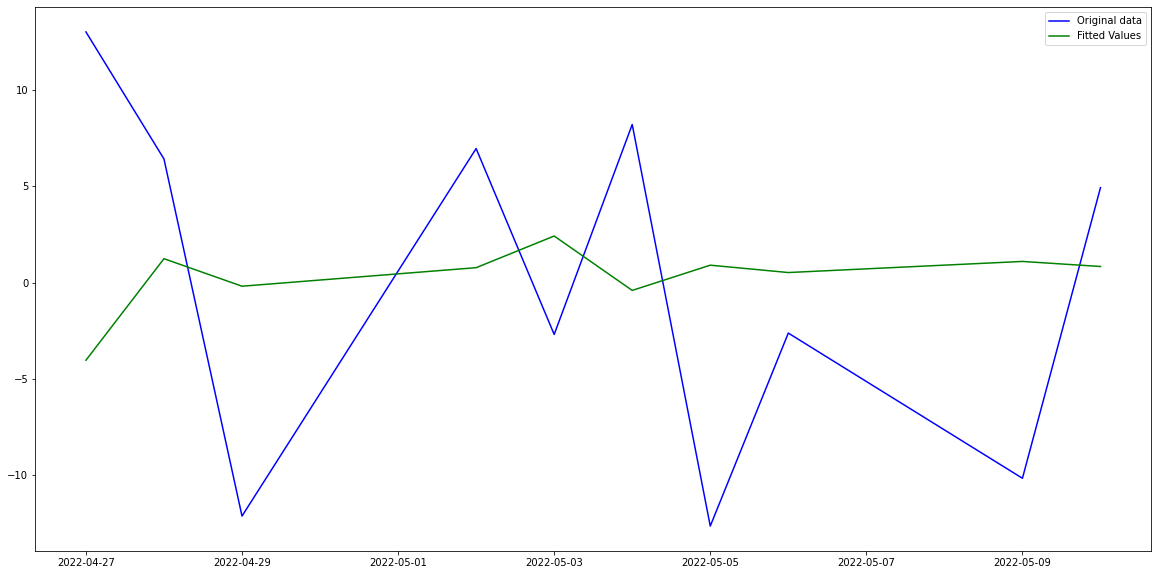

In [44]:
plt.figure(figsize=(20,10))
plt.plot(yr_test_df, color='blue', label='Original data')
plt.plot(yr_future_forecast, color='green', label='Fitted Values')
plt.legend()

In [422]:
#MAPE
def mape(y, y_hat):
    return np.mean(np.abs((y - y_hat)/y)*100)

In [424]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
mae = mean_absolute_error(yr_future_forecast,yr_test_df)
mse = mean_squared_error(yr_future_forecast,yr_test_df)
rmse = np.sqrt(mse)
print('Mean absolute error:',mae)
print('Mean squared error:',mse)
print('Root Mean absolute error:',rmse)
print('Mean Absolute Percentage Error:',mape(yr_test_df['Close'],yr_future_forecast['Prediction']))

Mean absolute error: 8.601416217202537
Mean squared error: 93.32616492006568
Root Mean absolute error: 9.660546823035727
Mean Absolute Percentage Error: 111.45395064614361


In [46]:
print(log_df_diff.shape)
log_df_diff.head()

(1256, 1)


,Close
Date,
2017-05-16,0.013781
2017-05-17,-0.013249
2017-05-18,-0.010577
2017-05-19,-0.025093
2017-05-22,0.014272


C:\Users\matho\AppData\Local\Programs\Python\Python310\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 1440x720 with 0 Axes>

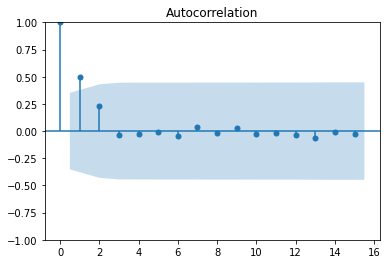

<Figure size 1440x720 with 0 Axes>

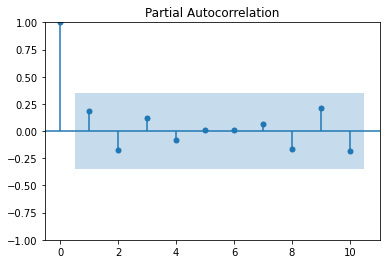

In [47]:
import statsmodels.api as sm
df_acf=acf(log_df_diff)
df_pacf=pacf(log_df_diff)
fig1=plt.figure(figsize=(20,10))
fig1=sm.graphics.tsa.plot_acf(df_acf)
fig2=plt.figure(figsize=(20,10))
fig2=sm.graphics.tsa.plot_pacf(df_pacf,lags=10)

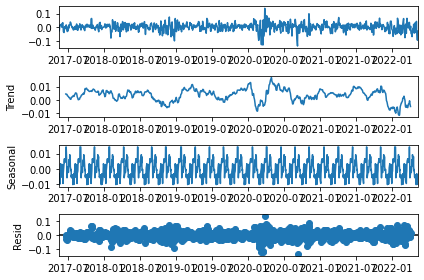

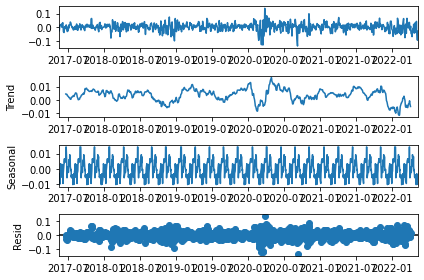

In [48]:
results=seasonal_decompose(log_df_diff,model="additive",period=50)
results.plot()

<AxesSubplot:xlabel='Date'>

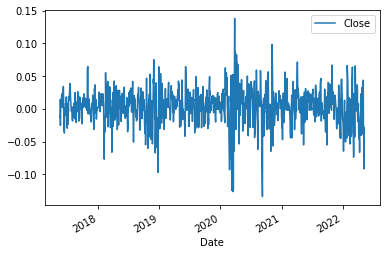

In [49]:
log_df_diff.plot()

#  Difference data

In [459]:
train_df=ts_diff.loc[:'2022-03-29']
test_df=ts_diff.loc['2022-03-29':]

In [460]:
test_df.shape

(30, 1)

In [458]:
ts_diff.loc[:'2022-04-28']

,Close
Date,
2017-05-12,-0.080002
2017-05-15,0.050003
2017-05-16,0.980004
2017-05-17,-1.930001
2017-05-18,0.229996
...,...
2022-04-22,-6.779999
2022-04-25,6.690002
2022-04-26,-10.500000


In [430]:
ts_diff.loc['2022-04-27':].shape

(10, 1)

In [461]:
#differenced original series
model=auto_arima(train_df,start_p=0,start_q=0,max_p=3,d=1,
                max_q=3,seasonal=True,suppress_warnings=True,
                trace=True,error_action='ignore',
                stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7442.442, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6878.538, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7440.443, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=6712.834, Time=0.28 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=6639.995, Time=0.32 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.61 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.83 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=6638.004, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=6710.840, Time=0.14 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=inf, Time=1.12 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.68 sec

Best model:  ARIMA(3,1,0)(0,0,0)[0]          
Total fit time: 8.421 seconds


In [462]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1229
Model:               SARIMAX(3, 1, 0)   Log Likelihood               -3315.002
Date:                Wed, 20 Jul 2022   AIC                           6638.004
Time:                        21:29:58   BIC                           6658.456
Sample:                             0   HQIC                          6645.699
                               - 1229                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9116      0.017    -52.297      0.000      -0.946      -0.877
ar.L2         -0.5579      0.024    -23.285      0.000      -0.605      -0.511
ar.L3         -0.2431      0.020    -12.417      0.000      -0.281      -0.205
sigma2        12.9409      0.288     44.970      0.000      12.377      13.505
===================================================================================
Ljung-Box (L1) (Q):                   3.92   Jarque-Bera (JB):              1574.68
Prob(Q):                              0.05   Prob(JB):                         0.00
Heteroskedasticity (H):               8.13   Skew:                             0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Date'>

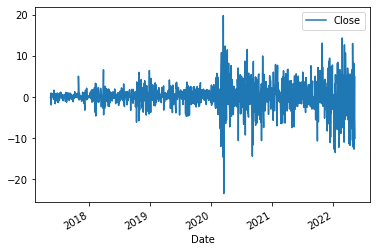

In [463]:
ts_diff.plot()

In [464]:
test_df

,Close
Date,
2022-03-29,4.709992
2022-03-30,-1.550019
2022-03-31,-5.549987
2022-04-01,1.110015
2022-04-04,5.549988
2022-04-05,-4.089996
2022-04-06,-11.380005
2022-04-07,1.869995
2022-04-08,-4.399994


In [473]:
future_forecast = model.predict(n_periods=30)
#future_forecast = np.exp(future_forecast)
future_forecast

array([3.88757627, 4.11729719, 4.92836682, 4.26078843, 4.36096007,
       4.44492623, 4.47479755, 4.37636529, 4.42901371, 4.42867751,
       4.42354031, 4.41561086, 4.42578718, 4.42218378, 4.4217186 ,
       4.42167905, 4.42285072, 4.42191781, 4.42212412, 4.4221717 ,
       4.42224003, 4.42210104, 4.42217805, 4.42216879, 4.42216806,
       4.42215517, 4.42216958, 4.42216381, 4.42216416, 4.42216355])

In [474]:
future_forecast = pd.DataFrame(future_forecast,index = test_df.index,columns=['Prediction'])

future_forecast.index = pd.to_datetime(future_forecast.index, format="%Y/%m/%d")
future_forecast.head()

,Prediction
Date,
2022-03-29,3.887576
2022-03-30,4.117297
2022-03-31,4.928367
2022-04-01,4.260788
2022-04-04,4.360960


In [475]:
test_df.head()

,Close
Date,
2022-03-29,4.709992
2022-03-30,-1.550019
2022-03-31,-5.549987
2022-04-01,1.110015
2022-04-04,5.549988


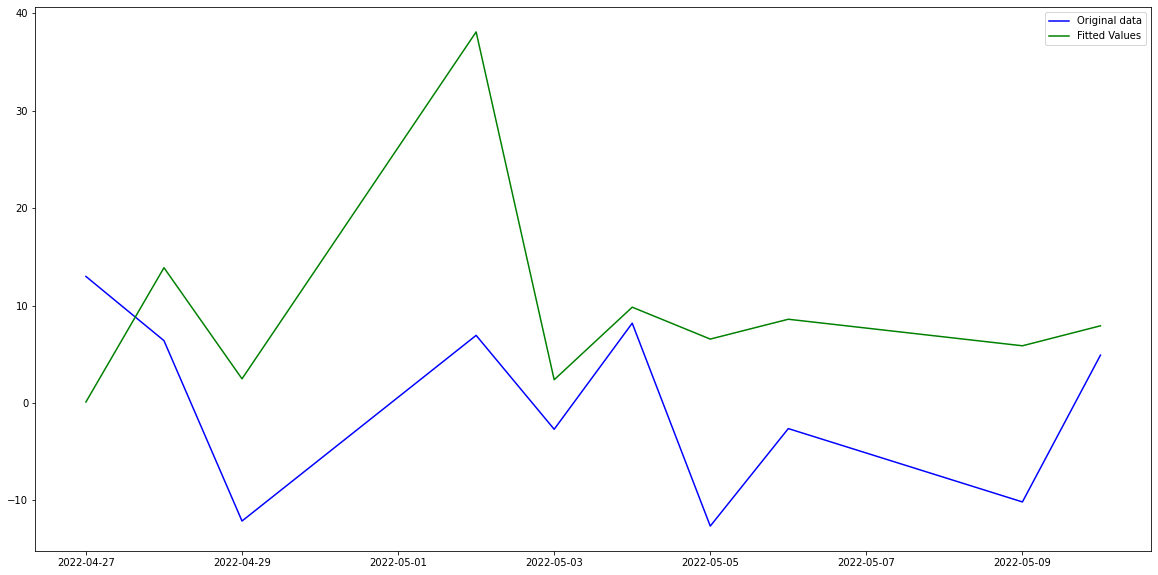

In [439]:
#last 10 days(exponential value)
plt.figure(figsize=(20,10))
plt.plot(test_df, color='blue', label='Original data')
plt.plot(future_forecast, color='green', label='Fitted Values')
plt.legend()

In [445]:
mae = mean_absolute_error(future_forecast,test_df)
mse = mean_squared_error(future_forecast,test_df)
rmse = np.sqrt(mse)
print('Mean absolute error:',mae)
print('Mean squared error:',mse)
print('Root Mean absolute error:',rmse)
print('Mean Absolute Percentage Error:',mape(test_df['Close'],future_forecast['Prediction']))

Mean absolute error: 12.231855525179437
Mean squared error: 219.49449164852058
Root Mean absolute error: 14.815346491004542
Mean Absolute Percentage Error: 179.3376978506671


# Long Term Forecasting (30 days)

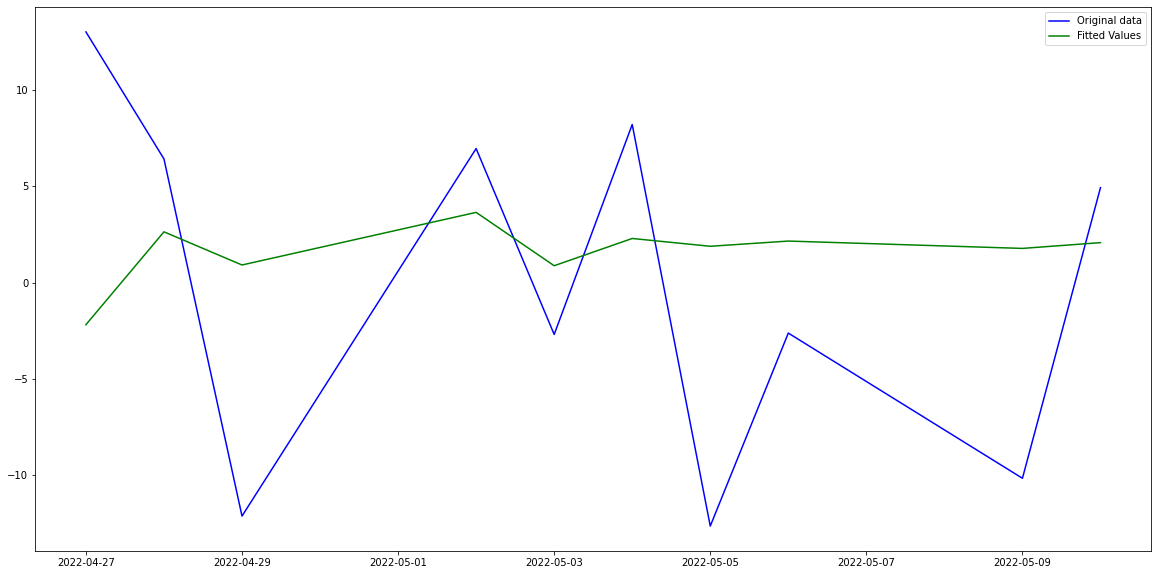

In [448]:
#last 10 days 
plt.figure(figsize=(20,10))
plt.plot(test_df, color='blue', label='Original data')
plt.plot(future_forecast, color='green', label='Fitted Values')
plt.legend()

In [449]:
mae = mean_absolute_error(future_forecast,test_df)
mse = mean_squared_error(future_forecast,test_df)
rmse = np.sqrt(mse)
print('Mean absolute error:',mae)
print('Mean squared error:',mse)
print('Root Mean absolute error:',rmse)
print('Mean Absolute Percentage Error:',mape(test_df['Close'],future_forecast['Prediction']))

Mean absolute error: 7.882627695567402
Mean squared error: 85.66451514102452
Root Mean absolute error: 9.255512689258468
Mean Absolute Percentage Error: 100.79013126050236


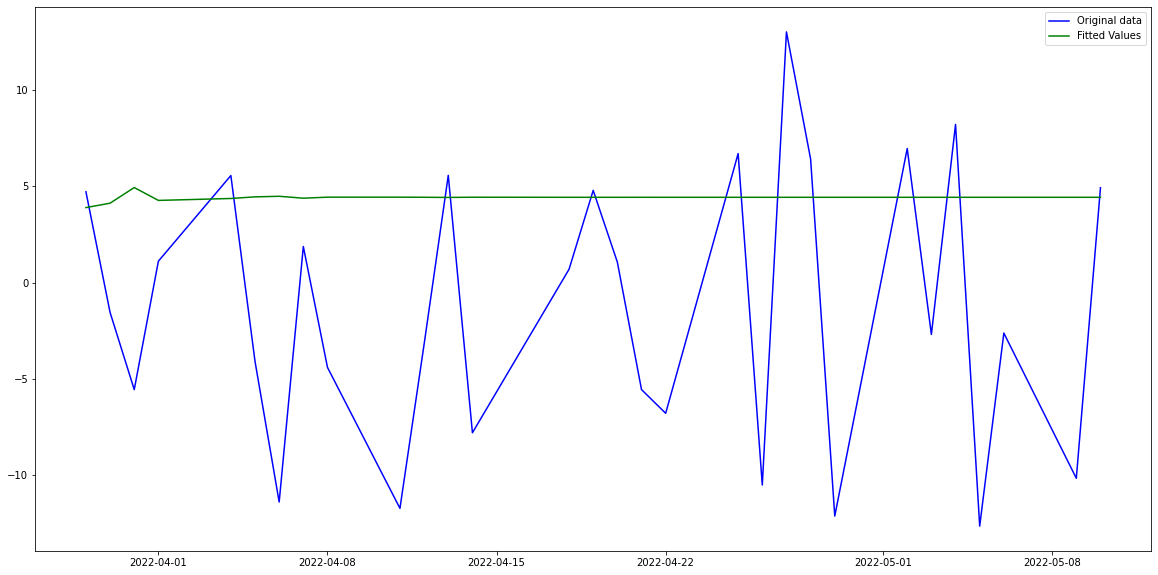

In [476]:
#last 30 days
plt.figure(figsize=(20,10))
plt.plot(test_df, color='blue', label='Original data')
plt.plot(future_forecast, color='green', label='Fitted Values')
plt.legend()

In [477]:
mae = mean_absolute_error(future_forecast,test_df)
mse = mean_squared_error(future_forecast,test_df)
rmse = np.sqrt(mse)
print('Mean absolute error:',mae)
print('Mean squared error:',mse)
print('Root Mean absolute error:',rmse)
print('Mean Absolute Percentage Error:',mape(test_df['Close'],future_forecast['Prediction']))

Mean absolute error: 7.321747947579362
Mean squared error: 82.82207122168579
Root Mean absolute error: 9.100663229769893
Mean Absolute Percentage Error: 154.58647550609876


# Log Differenced

In [478]:
train_log_df=log_df_diff.loc[:'2022-04-27']
test_log_df=log_df_diff.loc['2022-04-27':]

In [479]:
test_log_df.shape

(10, 1)

In [480]:
#log differenced
log_model=auto_arima(train_log_df,start_p=1,start_q=1, d=1,
                seasonal=False,suppress_warnings=True,
                trace=True,error_action='ignore',
                stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-5762.923, Time=1.44 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-5628.204, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-5720.305, Time=0.26 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-5716.690, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-5630.203, Time=0.23 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-5766.385, Time=1.86 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-5732.892, Time=0.18 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-6088.077, Time=2.48 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-5943.877, Time=0.26 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-6068.064, Time=3.11 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-6078.945, Time=2.78 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.46 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-6009.514, Time=0.90 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-6001.004, Time=3.30 sec
 ARIMA(3,1,1)(0,0,0)[0]  

In [481]:
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1247
Model:               SARIMAX(3, 1, 1)   Log Likelihood                3050.038
Date:                Wed, 20 Jul 2022   AIC                          -6088.077
Time:                        21:32:53   BIC                          -6057.311
Sample:                             0   HQIC                         -6076.509
                               - 1247                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -8.983e-06   1.84e-05     -0.488      0.626   -4.51e-05    2.71e-05
ar.L1          0.5149      0.015     33.625      0.000       0.485       0.545
ar.L2          0.2117      0.015     13.804      0.000       0.182       0.242
ar.L3         -0.3525      0.016    -21.556      0.000      -0.385      -0.320
ma.L1         -0.9701      0.006   -175.329      0.000      -0.981      -0.959
sigma2         0.0004   9.11e-06     44.011      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   3.83   Jarque-Bera (JB):              1064.12
Prob(Q):                              0.05   Prob(JB):                         0.00
Heteroskedasticity (H):               1.34   Skew:                            -0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [482]:
future_forecast = log_model.predict(n_periods=10)
#future_forecast = np.exp(future_forecast)
future_forecast

array([ 0.01254523,  0.02367251, -0.00011137, -0.00280494, -0.01315807,
       -0.01068462, -0.01066262, -0.00648747, -0.00521402, -0.00369118])

In [483]:
test_log_df 

,Close
Date,
2022-04-27,0.032986
2022-04-28,0.031247
2022-04-29,0.026657
2022-05-02,0.004404
2022-05-03,-0.027478
2022-05-04,0.043919
2022-05-05,-0.025348
2022-05-06,-0.025338
2022-05-09,-0.091668


In [484]:
future_forecast = pd.DataFrame(future_forecast,index = test_log_df.index,columns=['Prediction'])

future_forecast.index = pd.to_datetime(future_forecast.index, format="%Y/%m/%d")
future_forecast.head()

,Prediction
Date,
2022-04-27,0.012545
2022-04-28,0.023673
2022-04-29,-0.000111
2022-05-02,-0.002805
2022-05-03,-0.013158


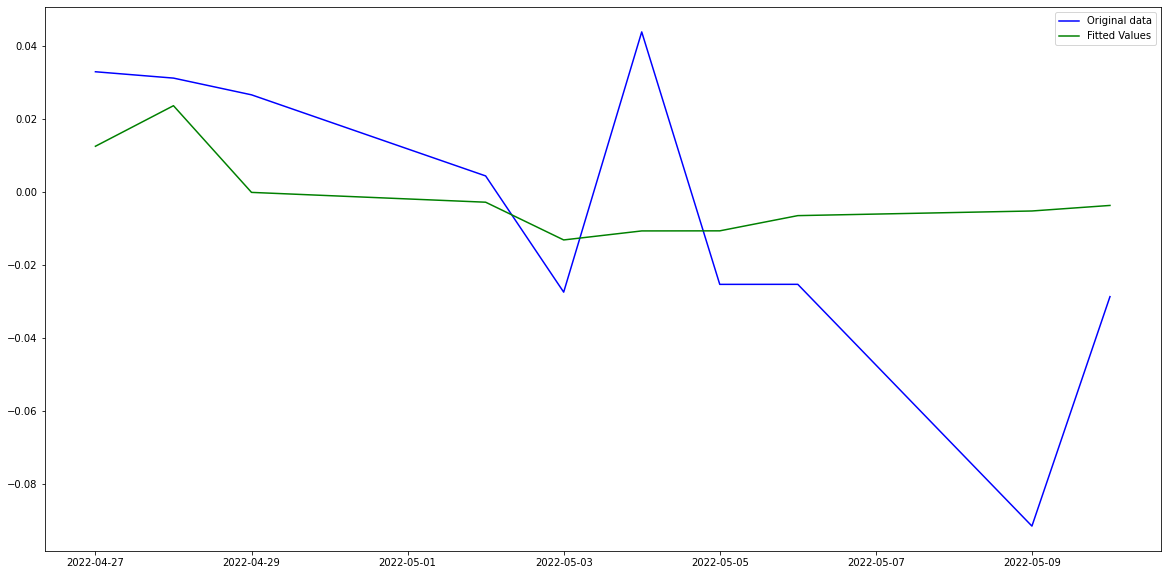

In [485]:
#log differenced lst 10 days
plt.figure(figsize=(20,10))
plt.plot(test_log_df, color='blue', label='Original data')
plt.plot(future_forecast, color='green', label='Fitted Values')
plt.legend()
plt.show()

In [486]:
future_forecast['Actual'] = ts_diff['Close']
future_forecast['Residual_Squared'] = np.square(future_forecast['Actual']-future_forecast['Prediction'])
future_forecast

,Prediction,Actual,Residual_Squared
Date,,,
2022-04-27,0.012545,13.000000,168.673981
2022-04-28,0.023673,6.410004,40.785230
2022-04-29,-0.000111,-12.110016,146.649790
2022-05-02,-0.002805,6.950012,48.341663
2022-05-03,-0.013158,-2.690002,7.165493
2022-05-04,-0.010685,8.200012,67.415539
2022-05-05,-0.010663,-12.630005,159.247802
2022-05-06,-0.006487,-2.619995,6.830422
2022-05-09,-0.005214,-10.150024,102.917170


In [487]:
mae = mean_absolute_error(future_forecast['Prediction'],test_log_df)
mse = mean_squared_error(future_forecast['Prediction'],test_log_df)
rmse = np.sqrt(mse)
print('Mean absolute error:',mae)
print('Mean squared error:',mse)
print('Root Mean absolute error:',rmse)
print('Mean Absolute Percentage Error:',mape(test_log_df['Close'],future_forecast['Prediction']))

Mean absolute error: 0.02759253247655697
Mean squared error: 0.0013101674095874487
Root Mean absolute error: 0.03619623474323605
Mean Absolute Percentage Error: 84.05470618032214


In [488]:
log_model=auto_arima(train_log_df,start_p=1,start_q=1, d=1,
                seasonal=True,suppress_warnings=True,
                trace=True,error_action='ignore',
                stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-5762.923, Time=1.52 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-5628.204, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-5720.305, Time=0.26 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-5716.690, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-5630.203, Time=0.22 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-5766.385, Time=1.95 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-5732.892, Time=0.21 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-6088.077, Time=2.58 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-5943.877, Time=0.27 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-6068.064, Time=3.19 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-6078.945, Time=2.76 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.52 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-6009.514, Time=0.91 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-6001.004, Time=3.32 sec
 ARIMA(3,1,1)(0,0,0)[0]  

In [378]:
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1247
Model:               SARIMAX(3, 1, 1)   Log Likelihood                3050.038
Date:                Wed, 20 Jul 2022   AIC                          -6088.077
Time:                        13:33:22   BIC                          -6057.311
Sample:                             0   HQIC                         -6076.509
                               - 1247                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -8.983e-06   1.84e-05     -0.488      0.626   -4.51e-05    2.71e-05
ar.L1          0.5149      0.015     33.625      0.000       0.485       0.545
ar.L2          0.2117      0.015     13.804      0.000       0.182       0.242
ar.L3         -0.3525      0.016    -21.556      0.000      -0.385      -0.320
ma.L1         -0.9701      0.006   -175.329      0.000      -0.981      -0.959
sigma2         0.0004   9.11e-06     44.011      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   3.83   Jarque-Bera (JB):              1064.12
Prob(Q):                              0.05   Prob(JB):                         0.00
Heteroskedasticity (H):               1.34   Skew:                            -0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [379]:
residuals_log_diff = log_model.resid()
residuals_log_diff_square = np.square(residuals_log_diff)

In [380]:
stepwise_model_residual_sqr = auto_arima(residuals_log_diff_square, start_p=0, start_q=0,
                           max_p=3, max_q=3,max_P=5, max_Q=5,
                           start_P=0, seasonal=True,
                           trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-13065.639, Time=0.31 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-13474.498, Time=0.91 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-13670.355, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-13067.637, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-13618.852, Time=1.41 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-13699.397, Time=1.61 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-13699.453, Time=1.60 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-13708.608, Time=1.84 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-13675.508, Time=7.57 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-13144.956, Time=1.82 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-13726.675, Time=2.49 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-13719.279, Time=2.29 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-13720.777, Time=2.65 sec
 ARIMA(2,1,3)(0,0,0)[0]             : AIC=-13728.792, Time=0.48 sec
 ARIM

In [381]:
stepwise_model_residual_sqr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1247
Model:               SARIMAX(2, 1, 3)   Log Likelihood                6870.396
Date:                Wed, 20 Jul 2022   AIC                         -13728.792
Time:                        13:34:05   BIC                         -13698.026
Sample:                             0   HQIC                        -13717.224
                               - 1247                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4486      0.070     -6.372      0.000      -0.587      -0.311
ar.L2         -0.2906      0.060     -4.847      0.000      -0.408      -0.173
ma.L1         -0.3723      0.070     -5.327      0.000      -0.509      -0.235
ma.L2          0.0048      0.059      0.081      0.935      -0.110       0.120
ma.L3         -0.3755      0.049     -7.658      0.000      -0.472      -0.279
sigma2      9.396e-07   1.01e-08     92.621      0.000     9.2e-07     9.6e-07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             58680.05
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.23   Skew:                             3.58
Prob(H) (two-sided):                  0.04   Kurtosis:                        35.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [490]:
future_forecast = stepwise_model_residual_sqr.predict(n_periods=10)
future_forecast

array([0.00082128, 0.00109602, 0.00067944, 0.0007865 , 0.00085952,
       0.00079565, 0.00080309, 0.00081831, 0.00080932, 0.00080893])

In [491]:
future_forecast = pd.DataFrame(future_forecast,index = test_log_df.index,columns=['Epsilon_forecast'])

future_forecast.index = pd.to_datetime(future_forecast.index, format="%Y/%m/%d")
future_forecast.head()

,Epsilon_forecast
Date,
2022-04-27,0.028658
2022-04-28,0.033106
2022-04-29,0.026066
2022-05-02,0.028045
2022-05-03,0.029318


In [492]:
future_forecast

,Epsilon_forecast
Date,
2022-04-27,0.028658
2022-04-28,0.033106
2022-04-29,0.026066
2022-05-02,0.028045
2022-05-03,0.029318
2022-05-04,0.028207
2022-05-05,0.028339
2022-05-06,0.028606
2022-05-09,0.028449


In [399]:
mean_price = ts_df['2022-04-25':'2022-04-26'].mean()
mean_price

Close    275.470001
dtype: float64

In [400]:
a = np.random.normal(0,1,10)
a

array([ 0.13764936,  1.02523651, -1.05413116,  0.53906046,  1.24004874,
       -0.80958178, -1.60111815,  1.84679206,  0.28915479,  0.65534751])

In [494]:
future_forecast['Actual'] = ts_df['Close']
t_1 = ts_df.loc['2022-04-27':]
future_forecast['T-1'] = t_1.values
future_forecast['Random_a'] = np.sign(a)
future_forecast['True_Epsilon_forecast'] = np.exp(future_forecast['Epsilon_forecast'] * future_forecast['Random_a'])
future_forecast['Prediction'] = future_forecast['True_Epsilon_forecast'] * float(mean_price)

In [495]:
future_forecast

,Epsilon_forecast,Actual,T-1,Random_a,True_Epsilon_forecast,Prediction
Date,,,,,,
2022-04-27,0.028658,283.220001,283.220001,1.0,1.029073,283.478637
2022-04-28,0.033106,289.630005,289.630005,1.0,1.033660,284.742411
2022-04-29,0.026066,277.519989,277.519989,-1.0,0.974271,268.382341
2022-05-02,0.028045,284.470001,284.470001,1.0,1.028442,283.304783
2022-05-03,0.029318,281.779999,281.779999,1.0,1.029752,283.665675
2022-05-04,0.028207,289.980011,289.980011,-1.0,0.972187,267.808300
2022-05-05,0.028339,277.350006,277.350006,-1.0,0.972059,267.773095
2022-05-06,0.028606,274.730011,274.730011,1.0,1.029019,283.463925
2022-05-09,0.028449,264.579987,264.579987,1.0,1.028857,283.419261


In [496]:
for i in range(1,future_forecast.shape[0]):
  
     future_forecast['Prediction'].iloc[i] = future_forecast['True_Epsilon_forecast'].iloc[i] * future_forecast['Prediction'].iloc[i-1]

In [497]:
future_forecast

,Epsilon_forecast,Actual,T-1,Random_a,True_Epsilon_forecast,Prediction
Date,,,,,,
2022-04-27,0.028658,283.220001,283.220001,1.0,1.029073,283.478637
2022-04-28,0.033106,289.630005,289.630005,1.0,1.033660,293.020620
2022-04-29,0.026066,277.519989,277.519989,-1.0,0.974271,285.481394
2022-05-02,0.028045,284.470001,284.470001,1.0,1.028442,293.600914
2022-05-03,0.029318,281.779999,281.779999,1.0,1.029752,302.336012
2022-05-04,0.028207,289.980011,289.980011,-1.0,0.972187,293.927082
2022-05-05,0.028339,277.350006,277.350006,-1.0,0.972059,285.714466
2022-05-06,0.028606,274.730011,274.730011,1.0,1.029019,294.005677
2022-05-09,0.028449,264.579987,264.579987,1.0,1.028857,302.489823


In [498]:
future_forecast = future_forecast['Prediction']

In [501]:
t_1

,Close
Date,
2022-04-27,283.220001
2022-04-28,289.630005
2022-04-29,277.519989
2022-05-02,284.470001
2022-05-03,281.779999
2022-05-04,289.980011
2022-05-05,277.350006
2022-05-06,274.730011
2022-05-09,264.579987


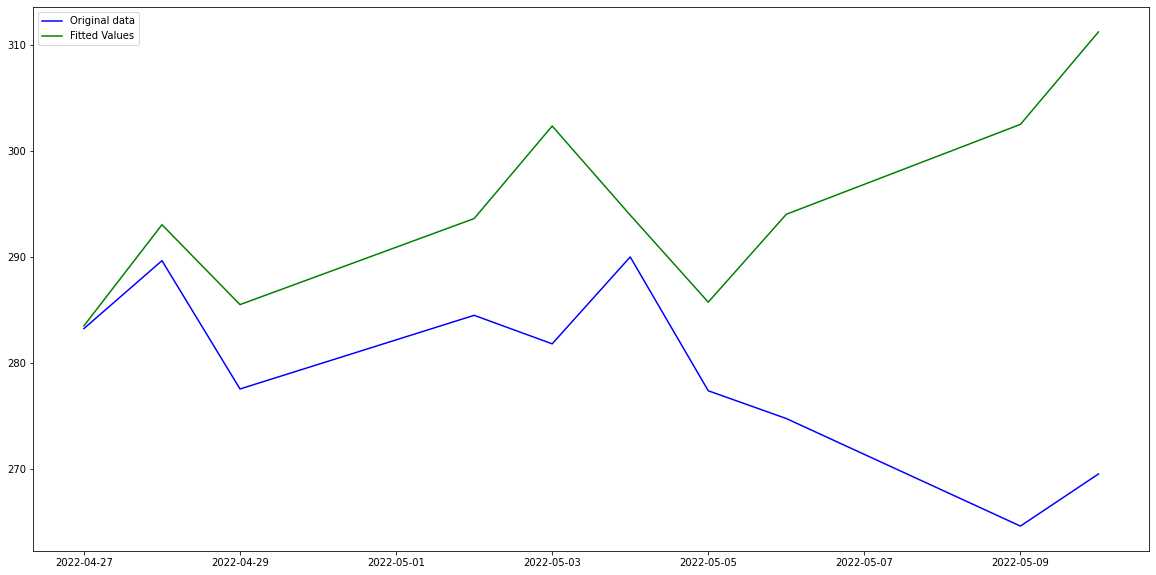

In [499]:
plt.figure(figsize=(20,10))
plt.plot(t_1, color='blue', label='Original data')
plt.plot(future_forecast, color='green', label='Fitted Values')
plt.legend()

In [503]:
mae = mean_absolute_error(future_forecast,t_1['Close'])
mse = mean_squared_error(future_forecast,t_1['Close'])
rmse = np.sqrt(mse)
print('Mean absolute error:',mae)
print('Mean squared error:',mse)
print('Root Mean absolute error:',rmse)
print('Mean Absolute Percentage Error:',mape(t_1['Close'],future_forecast))

Mean absolute error: 15.251127261437698
Mean squared error: 421.5400471218812
Root Mean absolute error: 20.531440454139627
Mean Absolute Percentage Error: 5.5836426541038415


# GARCH Model

<AxesSubplot:xlabel='Date'>

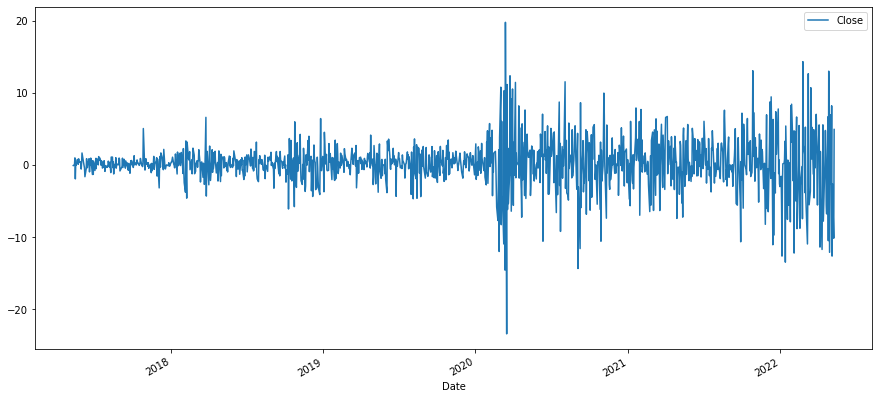

In [504]:
ts_diff.plot(figsize=(15,7))

C:\Users\matho\AppData\Local\Programs\Python\Python310\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 1440x720 with 0 Axes>

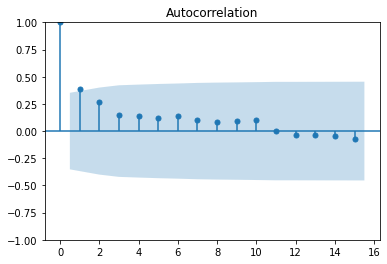

<Figure size 1440x720 with 0 Axes>

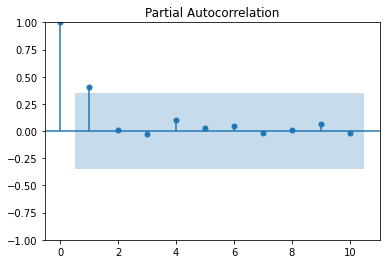

In [100]:
ts_acf=acf(ts_diff **2)
ts_pacf=pacf(ts_diff**2)
fig1=plt.figure(figsize=(20,10))
fig1=sm.graphics.tsa.plot_acf(ts_acf)
fig2=plt.figure(figsize=(20,10))
fig2=sm.graphics.tsa.plot_pacf(ts_pacf,lags=10)

In [101]:
from arch import arch_model

In [102]:
mod = arch_model(ts_diff,vol = 'GARCH', p=1, q=1)

In [103]:
mod_fit = mod.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 28291.081397595884
Iteration:      2,   Func. Count:     14,   Neg. LLF: 1915557.4302066353
Iteration:      3,   Func. Count:     21,   Neg. LLF: 2938.174755632511
Iteration:      4,   Func. Count:     27,   Neg. LLF: 2907.561976470208
Iteration:      5,   Func. Count:     33,   Neg. LLF: 2935.5842877383384
Iteration:      6,   Func. Count:     39,   Neg. LLF: 2921.6853503692105
Iteration:      7,   Func. Count:     45,   Neg. LLF: 2919.6869638559947
Iteration:      8,   Func. Count:     51,   Neg. LLF: 2870.883359765403
Iteration:      9,   Func. Count:     57,   Neg. LLF: 2861.9577022058666
Iteration:     10,   Func. Count:     62,   Neg. LLF: 2861.9285902722586
Iteration:     11,   Func. Count:     68,   Neg. LLF: 2861.7903286096816
Iteration:     12,   Func. Count:     73,   Neg. LLF: 2861.790309323246
Iteration:     13,   Func. Count:     78,   Neg. LLF: 2861.790308276507
Iteration:     14,   Func. Count:     82,   Neg. LLF: 28

In [106]:
mod_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2861.79
Distribution:                  Normal   AIC:                           5731.58
Method:            Maximum Likelihood   BIC:                           5752.13
                                        No. Observations:                 1258
Date:                Wed, Jul 20 2022   Df Residuals:                     1257
Time:                        05:59:04   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1745  4.617e-02      3.778  1.578e-04 [8.396e-02,  0.265]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0614  3.839e-02      1.600      0.110 [-1.383e-02,  0.137]
alpha[1]       0.1290  3.376e-02      3.820  1.333e-04  [6.280e-02,  0.195]
beta[1]        0.8710  3.408e-02     25.556 4.673e-144    [  0.804,  0.938]
===========================================================================

Covariance estimator: robust
"""

In [113]:
rolling_predictions = []
test_size = 365*3

for i in range(test_size):
    train = ts_diff[:-(test_size-i)]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

C:\Users\matho\AppData\Local\Programs\Python\Python310\Lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\matho\AppData\Local\Programs\Python\Python310\Lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\matho\AppData\Local\Programs\Python\Python310\Lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After Se

In [114]:
rolling_predictions = pd.Series(rolling_predictions, index=ts_diff.index[-365*3:])

,Close
Date,


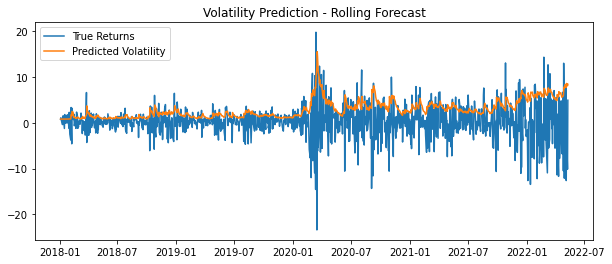

In [116]:
plt.figure(figsize=(10,4))
plt.plot(ts_diff[-365*3:])
plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast')
plt.legend(['True Returns', 'Predicted Volatility'])

In [109]:
train = ts_diff
model = arch_model(train, p=1, q=1)
model_fit = model.fit(disp='off')

In [117]:
from datetime import timedelta

In [118]:
pred = model_fit.forecast(horizon=7)
future_dates = [ts_diff.index[-1] + timedelta(days=i) for i in range(1,8)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

C:\Users\matho\AppData\Local\Programs\Python\Python310\Lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


In [119]:
future_dates

[Timestamp('2022-05-11 00:00:00'),
 Timestamp('2022-05-12 00:00:00'),
 Timestamp('2022-05-13 00:00:00'),
 Timestamp('2022-05-14 00:00:00'),
 Timestamp('2022-05-15 00:00:00'),
 Timestamp('2022-05-16 00:00:00'),
 Timestamp('2022-05-17 00:00:00')]

Text(0.5, 1.0, 'Volatility Prediction - Next 7 Days')

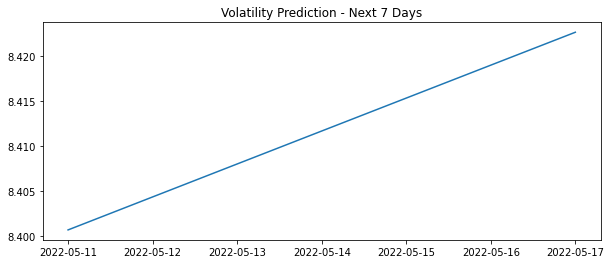

In [120]:
plt.figure(figsize=(10,4))
plt.plot(pred)
plt.title('Volatility Prediction - Next 7 Days')

# Combining ARIMA- GARCH models

In [318]:
train_argh = ts_diff[:'2022-04-30']

In [506]:
train_argh

,Close
Date,
2017-05-12,-0.080002
2017-05-15,0.050003
2017-05-16,0.980004
2017-05-17,-1.930001
2017-05-18,0.229996
...,...
2022-04-25,6.690002
2022-04-26,-10.500000
2022-04-27,13.000000


In [320]:
test_argh = ts_diff['2022-04-30':]

In [321]:
test_argh.shape

(7, 1)

In [322]:
model_arima = auto_arima(train_argh,start_p=0,start_q=0, d=1,
                seasonal=False,suppress_warnings=True,
                trace=True,error_action='ignore',
                stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7648.455, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7106.933, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.38 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7646.459, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=6913.881, Time=0.26 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=6834.263, Time=0.37 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=6775.670, Time=0.39 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=6765.419, Time=0.40 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=4.39 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=3.83 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=6763.419, Time=0.24 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=6773.670, Time=0.20 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=inf, Time=2.32 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=inf, Time=1.76 sec

Best model:  ARIMA(5,1,0)(0,0,0)[0]          
Total fit t

In [323]:
arima_resid = model_arima.resid()

In [324]:
model_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1251
Model:               SARIMAX(5, 1, 0)   Log Likelihood               -3375.710
Date:                Wed, 20 Jul 2022   AIC                           6763.419
Time:                        06:48:35   BIC                           6794.204
Sample:                             0   HQIC                          6774.992
                               - 1251                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9974      0.018    -56.531      0.000      -1.032      -0.963
ar.L2         -0.7638      0.027    -28.136      0.000      -0.817      -0.711
ar.L3         -0.5264      0.029    -18.102      0.000      -0.583      -0.469
ar.L4         -0.3174      0.025    -12.462      0.000      -0.367      -0.267
ar.L5         -0.1003      0.018     -5.517      0.000      -0.136      -0.065
sigma2        12.9655      0.294     44.103      0.000      12.389      13.542
===================================================================================
Ljung-Box (L1) (Q):                   0.81   Jarque-Bera (JB):              1272.28
Prob(Q):                              0.37   Prob(JB):                         0.00
Heteroskedasticity (H):               8.82   Skew:                             0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [325]:
arima_resid

array([ -0.080002  ,   0.13000373,   1.00754801, ...,  13.5250811 ,
         9.75488272, -12.03838666])

C:\Users\matho\AppData\Local\Programs\Python\Python310\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 1440x720 with 0 Axes>

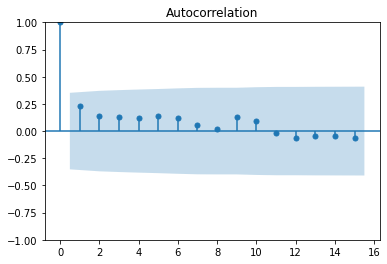

<Figure size 1440x720 with 0 Axes>

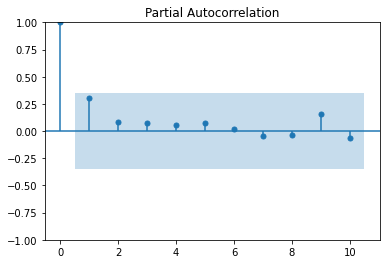

In [326]:
ts_acf=acf(arima_resid **2)
ts_pacf=pacf(arima_resid**2)
fig1=plt.figure(figsize=(20,10))
fig1=sm.graphics.tsa.plot_acf(ts_acf)
fig2=plt.figure(figsize=(20,10))
fig2=sm.graphics.tsa.plot_pacf(ts_pacf,lags=10)

In [327]:
garch = arch_model(arima_resid, p=1, q=1,vol = 'GARCH')
garch_fitted = garch.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 598934.3751895799
Iteration:      2,   Func. Count:     13,   Neg. LLF: 4258122.249128528
Iteration:      3,   Func. Count:     20,   Neg. LLF: 3004.9026558254286
Iteration:      4,   Func. Count:     26,   Neg. LLF: 2982.9791509463566
Iteration:      5,   Func. Count:     32,   Neg. LLF: 3000.5604089441904
Iteration:      6,   Func. Count:     38,   Neg. LLF: 2990.0072852039752
Iteration:      7,   Func. Count:     44,   Neg. LLF: 2988.2049080977763
Iteration:      8,   Func. Count:     50,   Neg. LLF: 2949.6775256417295
Iteration:      9,   Func. Count:     56,   Neg. LLF: 2946.3109644533597
Iteration:     10,   Func. Count:     61,   Neg. LLF: 2946.4111978275787
Iteration:     11,   Func. Count:     67,   Neg. LLF: 2946.3533183962254
Iteration:     12,   Func. Count:     73,   Neg. LLF: 2946.30106917307
Iteration:     13,   Func. Count:     78,   Neg. LLF: 2946.3010682402255
Optimization terminated successfully    (Exit mode 0)
 

In [328]:
garch_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2946.30
Distribution:                  Normal   AIC:                           5900.60
Method:            Maximum Likelihood   BIC:                           5921.13
                                        No. Observations:                 1251
Date:                Wed, Jul 20 2022   Df Residuals:                     1250
Time:                        06:48:38   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0219  4.895e-02      0.447      0.655 [-7.404e-02,  0.118]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0607  4.106e-02      1.478      0.139 [-1.979e-02,  0.141]
alpha[1]       0.1256  3.436e-02      3.655  2.573e-04  [5.824e-02,  0.193]
beta[1]        0.8744  3.554e-02     24.602 1.188e-133    [  0.805,  0.944]
===========================================================================

Covariance estimator: robust
"""

In [356]:
garch_forecast = garch_fitted.forecast(horizon=7)

C:\Users\matho\AppData\Local\Programs\Python\Python310\Lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


In [357]:
predicted_et = garch_forecast.mean['h.1'].iloc[-1]

In [358]:
predicted_et

0.02189547818624495

In [359]:
prediction = predicted_mu + (predicted_et**1)

In [360]:
prediction

array([ 3.15331555, -0.16844133,  0.98536102,  0.88901437, -1.12805358,
       -0.12433957,  0.43294035])

In [361]:
#future_date = [ts_diff.index[-1] + timedelta(days=i) for i in range(1,8)]
argarch_forecast = pd.DataFrame(prediction,index = test_argh.index, columns=['Prediction'])
argarch_forecast.index = pd.to_datetime(argarch_forecast.index, format="%Y/%m/%d")
argarch_forecast.head()

,Prediction
Date,
2022-05-02,3.153316
2022-05-03,-0.168441
2022-05-04,0.985361
2022-05-05,0.889014
2022-05-06,-1.128054


In [511]:
test_argh.head()

,Close
Date,
2022-05-02,6.950012
2022-05-03,-2.690002
2022-05-04,8.200012
2022-05-05,-12.630005
2022-05-06,-2.619995


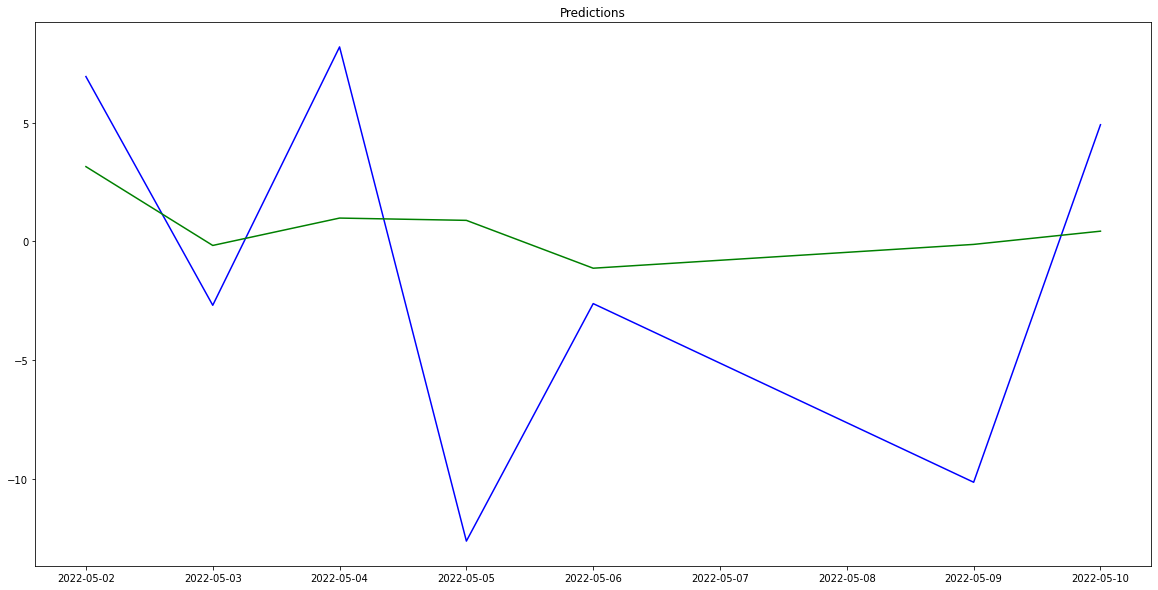

In [362]:
plt.figure(figsize=(20,10))
plt.plot(test_argh, color='blue', label='Original data')
plt.plot(argarch_forecast, color='green')
plt.title('Predictions')
plt.show()

In [510]:
mae = mean_absolute_error(argarch_forecast,test_argh)
mse = mean_squared_error(argarch_forecast,test_argh)
rmse = np.sqrt(mse)
print('Mean absolute error:',mae)
print('Mean squared error:',mse)
print('Root Mean absolute error:',rmse)
print('Mean Absolute Percentage Error:',mape(argarch_forecast['Prediction'],test_argh['Close']))

Mean absolute error: 6.150946569388227
Mean squared error: 54.06604347162568
Root Mean absolute error: 7.352961544277631
Mean Absolute Percentage Error: 1871.726212596209
